In [ ]:
!pip install xlrd

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0, 15, 150)

from scipy.optimize import minimize

res = minimize(
    error_parabola,          # меняешь модель
    x0=[1, 1, 1],             # старт
    args=(x, y)
)

params = res.x
error = res.fun

In [ ]:
df = pd.read_excel('Name.xls', header = None, names = ['x', 'y'])

x = df['x'].to_numpy()
y = df['y'].to_numpy()

### Синусоида (отбор 22/23)

In [ ]:
def error(params):
    a, b = params
    return np.sum((y - (np.sin(a * x) + b))**2)

res = minimize(error, x0=[2.0, 1.0], method='BFGS')

I = res.fun
a, b = res.x

print(f"{I:.2f}")

### Элипс (закл 23/24)

In [ ]:
def error(params):
    a, b = params
    return np.sum((x**2 / a**2 + y**2 / b**2 - 1)**2)

'''
a0 = np.max(np.abs(x))
b0 = np.max(np.abs(y))
'''

res = minimize(error, x0=[200, 300], method='L-BFGS-B', bounds=[(1, None), (1, None)])

I = res.fun
a, b = res.x

print(f"Ошибка I = {I:.6f}")
print(f"Большая полуось a = {a:.3f}")
print(f"Малая полуось b = {b:.3f}")

### Физическая постоянная (отбор 23/24)

In [ ]:
R = 8.314
T = 350

V = np.array([1.0e-4, 1.15e-4, 1.3e-4, 1.45e-4, 1.6e-4, 1.75e-4, 1.9e-4,
              2.05e-4, 2.2e-4, 2.35e-4, 2.5e-4, 2.65e-4, 2.8e-4, 2.95e-4,
              3.1e-4, 3.25e-4, 3.4e-4, 3.55e-4, 3.7e-4, 3.85e-4, 4.0e-4])
P_exp = np.array([150.29, 118.64, 98.23, 88.78, 80.75, 89.45, 77.45,
                  80.86, 75.21, 71.82, 76.27, 68.59, 71.32, 72.39,
                  66.19, 57.32, 57.7, 62.04, 62.93, 59.12, 50.37])  # атм

gases = [
    ("Ацетилен", 0.4516, 52.2e-6),
    ("Криптон", 0.2349, 39.78e-6),
    ("Бромоводород", 0.451, 44.31e-6),
    ("Пропан", 0.8779, 84.45e-6),
    ("Фторид кремния", 0.4251, 55.71e-6),
    ("Моносилан", 0.4377, 57.86e-6),
    ("Ксенон", 0.425, 51.05e-6),
    ("Фторметан", 0.4692, 52.64e-6),
    ("Аммиак", 0.4225, 37.1e-6),
    ("Сероводород", 0.449, 42.87e-6),
    ("Диоксид углерода", 0.364, 42.67e-6),
    ("Хлор", 0.6579, 56.22e-6),
    ("Циан", 0.7769, 69.01e-6)
]

errors = []
for name, a, b in gases:
    P_theor = (R*T/(V - b) - a/V**2) / 101325 

    err = np.sum((P_exp - P_theor)**2)
    
    errors.append((name, err))

errors.sort(key=lambda x: x[1])

best_gas, min_error = errors[0]
print(f"Газ: {best_gas}, ошибка = {min_error:.2f}")


### Продажи (закл 24/25)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('forecast1.csv')

y = df[df['Продажи'].notna()]['Продажи']
mask = df['Продажи'].isnull()

t = np.arange(104)
t = np.delete(t, df[mask].index.to_list())

X = pd.DataFrame(
    {'t': t, 
     't2': t**2, 
     'sin': np.sin(2 * np.pi * 1 / 13 * t)}
)

model = LinearRegression()
model.fit(X, y)

t_test = np.arange(104, 116)
test = pd.DataFrame(
    {'t': t_test, 
     't2': t_test**2, 
     'sin': np.sin(2 * np.pi * 1 / 13 * t_test)}
)

model.predict(test)

### Влажность (отбор 25/26)

In [ ]:
df1 = pd.read_csv('calibration_A.csv')
df2 = pd.read_csv('greenhouse_test_A.csv')

In [ ]:
plt.plot(df1['T_meas'], df1['T_true'], marker='o',)
plt.plot(df1['RH_meas'], df1['RH_true'], marker='o')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

df1 = pd.read_csv('calibration_A.csv')
df2 = pd.read_csv('greenhouse_test_A.csv')

modelT = LinearRegression()
modelT.fit(df1[['T_meas']], df1[['T_true']])
aT, bT = modelT.coef_[0], modelT.intercept_

modelRH = LinearRegression()
modelRH.fit(df1[['RH_meas']], df1[['RH_true']])
aRH, bRH = modelRH.coef_[0], modelRH.intercept_

df2['T_C_meas'] = df2['T_C_meas'].fillna((df2['T_C_meas'].shift(1) + df2['T_C_meas'].shift(-1)) / 2)
df2['RH_pct_meas'] = df2['RH_pct_meas'].fillna((df2['RH_pct_meas'].shift(1) + df2['RH_pct_meas'].shift(-1)) / 2)
df2['T_meas'] = df2['T_C_meas']
df2['RH_meas'] = df2['RH_pct_meas']

df2['T_true'] = modelT.predict(df2[['T_meas']])
df2['RH_true'] = modelRH.predict(df2[['RH_meas']])

df2['e_T_true'] = 0.6108 * np.exp(17.27 * df2['T_true']/(df2['T_true'] + 237.3))
df2['e_T_RH_true'] = df2['RH_true']/100 * df2['e_T_true']

df2['VPD'] = df2['e_T_true'] - df2['e_T_RH_true']
ans = len(df2[(df2['VPD'] > 1.2) | (df2['VPD'] < 0.6)])
ans

### парабола

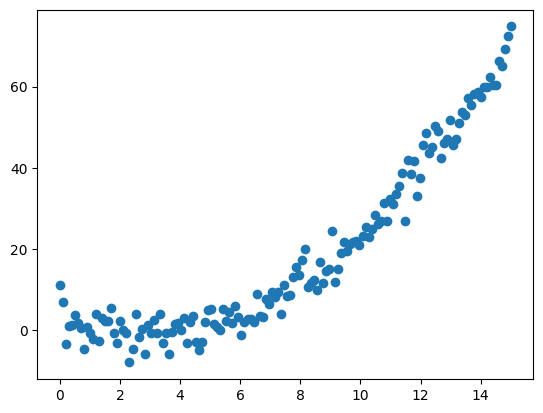

In [24]:
y = 0.5*x**2 - 3*x + 4 + np.random.normal(0, 3, 150)

plt.scatter(x, y)
plt.show()

In [ ]:
def model_parabola(x, params):
    a, b, c = params
    return a*x**2 + b*x + c


def error_parabola(params, x, y):
    return np.sum((y - model_parabola(x, params))**2)

### кубическая парабола

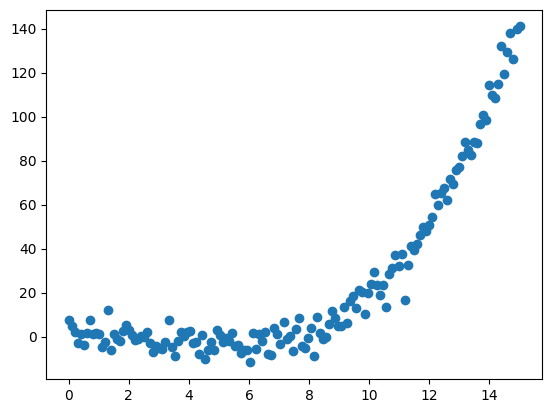

In [26]:
y = 0.1*x**3 - x**2 + 2*x + np.random.normal(0, 5, 150)

plt.scatter(x, y)
plt.show()

In [ ]:
def model_cubic(x, params):
    a, b, c, d = params
    return a*x**3 + b*x**2 + c*x + d


def error_cubic(params, x, y):
    return np.sum((y - model_cubic(x, params))**2)

### синус

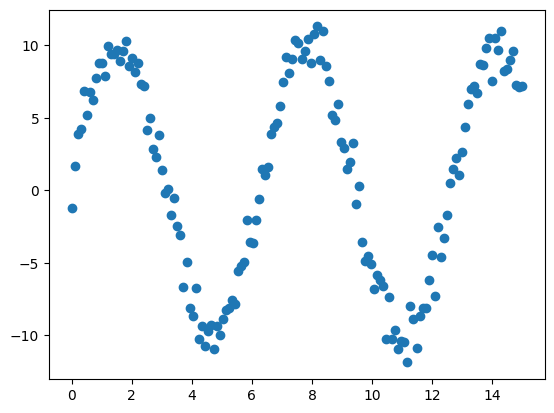

In [32]:
y = 10*np.sin(x) + np.random.normal(0, 1, 150)

plt.scatter(x, y)
plt.show()

In [ ]:
def model_sin(x, params):
    a, b = params
    return a * np.sin(x) + b


def error_sin(params, x, y):
    return np.sum((y - model_sin(x, params))**2)

In [ ]:
def model_sin(x, params):
    A, w, phi, b = params
    return A * np.sin(w*x + phi) + b


def error_sin(params, x, y):
    return np.sum((y - model_sin(x, params))**2)

### косинус

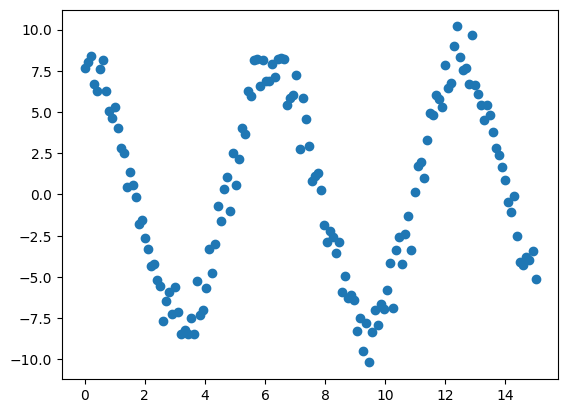

In [28]:
y = 8*np.cos(x) + np.random.normal(0, 1, 150)

plt.scatter(x, y)
plt.show()


In [ ]:
def model_cos(x, params):
    a, b = params
    return a * np.cos(x) + b


def error_cos(params, x, y):
    return np.sum((y - model_cos(x, params))**2)

In [ ]:
def model_cos(x, params):
    A, w, phi, b = params
    return A * np.cos(w*x + phi) + b


def error_cos(params, x, y):
    return np.sum((y - model_cos(x, params))**2)

### экспонента

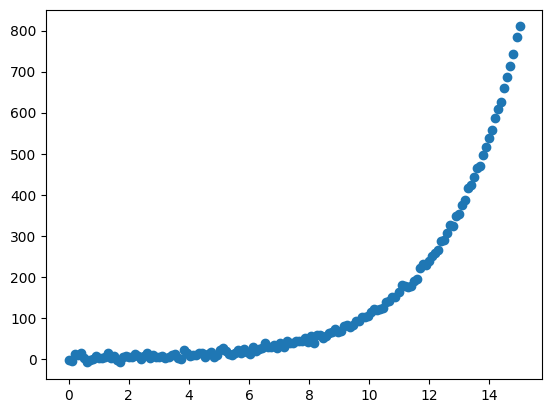

In [29]:
y = 2*np.exp(0.4*x) + np.random.normal(0, 5, 150)

plt.scatter(x, y)
plt.show()

In [ ]:
def model_exp(x, params):
    A, k, b = params
    return A * np.exp(k*x) + b


def error_exp(params, x, y):
    return np.sum((y - model_exp(x, params))**2)

### логарифм

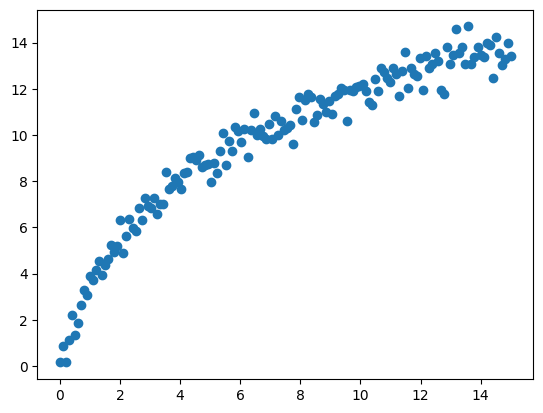

In [30]:
y = 5*np.log(x + 1) + np.random.normal(0, 0.5, 150)

plt.scatter(x, y)
plt.show()


In [ ]:
def model_log(x, params):
    a, b, c = params
    return a * np.log(x + c) + b


def error_log(params, x, y):
    return np.sum((y - model_log(x, params))**2)

### гипербола

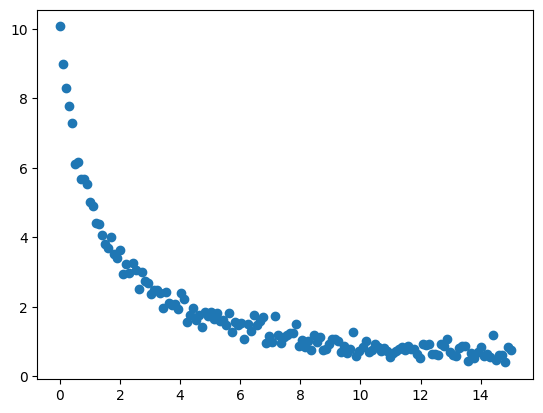

In [ ]:
y = 10/(x+1) + np.random.normal(0, 0.2, 150)

plt.scatter(x, y)
plt.show()

In [ ]:
def model_hyperbola(x, params):
    a, b, c = params
    return a / (x + b) + c


def error_hyperbola(params, x, y):
    return np.sum((y - model_hyperbola(x, params))**2)


### элипс

In [ ]:
def model_ellipse(x, y, params):
    a, b = params
    return x**2 / a**2 + y**2 / b**2


def error_ellipse(params, x, y):
    return np.sum((model_ellipse(x, y, params) - 1)**2)

### окружность

In [ ]:
def model_circle(x, y, params):
    R = params[0]
    return x**2 + y**2


def error_circle(params, x, y):
    return np.sum((model_circle(x, y, params) - params[0]**2)**2)

### ромб

In [ ]:
def model_rhombus(x, y, params):
    a, b = params
    return np.abs(x)/a + np.abs(y)/b


def error_rhombus(params, x, y):
    return np.sum((model_rhombus(x, y, params) - 1)**2)